In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
egs_frame = pd.read_csv('electron.csv')
files = ['ms_geant10pt5_00%s.csv' % i for i in range(1, 5)]
g410pt5_frame = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [3]:
def draw_histogram1D(ax, var, xmin, xmax, bins, **kargs): 
    
    bins = np.linspace(xmin, xmax, bins)
    values, xedges = np.histogram(var, bins=bins)
    bin_centers = (xedges + (xedges[1] - xedges[0])/2)[:-1]
    
    err_min = np.zeros(len(values))
    err_max = np.zeros(len(values))
    if 'errors' in kargs: 
        err_min, err_max = errors(values)
        
    if 'norm' in kargs:
        if kargs['norm'] == 1:
            integral = np.sum(values)
        else: 
            integral = kargs['norm']
            ax.set_ylabel('Event Fraction')
            
        values = values/integral
        
        if 'errors' in kargs: 
            err_min = np.array(err_min)/integral
            err_max = np.array(err_max)/integral
    
    if 'x_label' in kargs: 
        ax.set_xlabel(kargs['x_label'], fontsize=30)
        
    if 'y_label' in kargs: 
        ax.set_ylabel(kargs['y_label'], fontsize=30)
    
    color = 'forestgreen'
    if 'color' in kargs:
        color = kargs['color']

    edgecolor = 'darkgreen'
    if 'edgecolor' in kargs: 
        edgecolor = kargs['edgecolor']
    
    label = ''
    if 'label' in kargs: 
        label = kargs['label']
    
    matplotlib.rcParams.update({'font.size': 22})
    
    ax.hist(bin_centers, bins=xedges, weights=values, alpha=0.3, 
            linewidth=2, color=color, edgecolor=edgecolor, label=label )
    
    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
    ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

    ax.set_title('HPS Simulation Internal', x=.75, fontweight='bold')

    return values, bin_centers

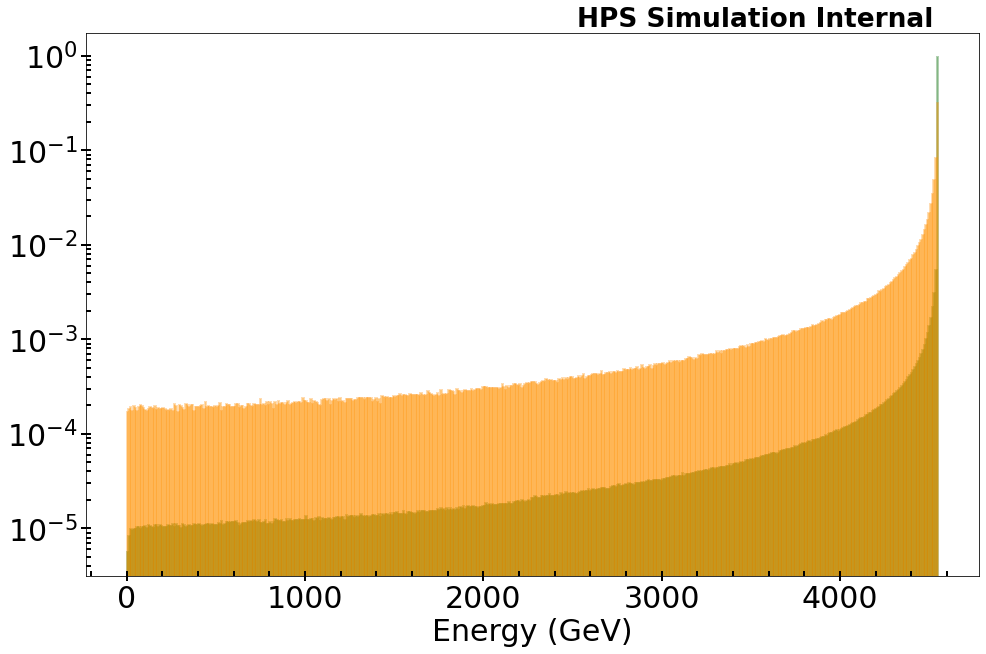

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, egs_frame[' Energy (GeV)'], 0, 4550, 501, 
                 x_label='Energy (GeV)', norm=1, 
                label='Inclusive')
draw_histogram1D(ax, g410pt5_frame['p']*1000, 0, 4550, 501, 
                 x_label='Energy (GeV)', norm=1,
                 edgecolor='darkorange', color='orange',
                label='Inclusive')
ax.set_yscale('log')

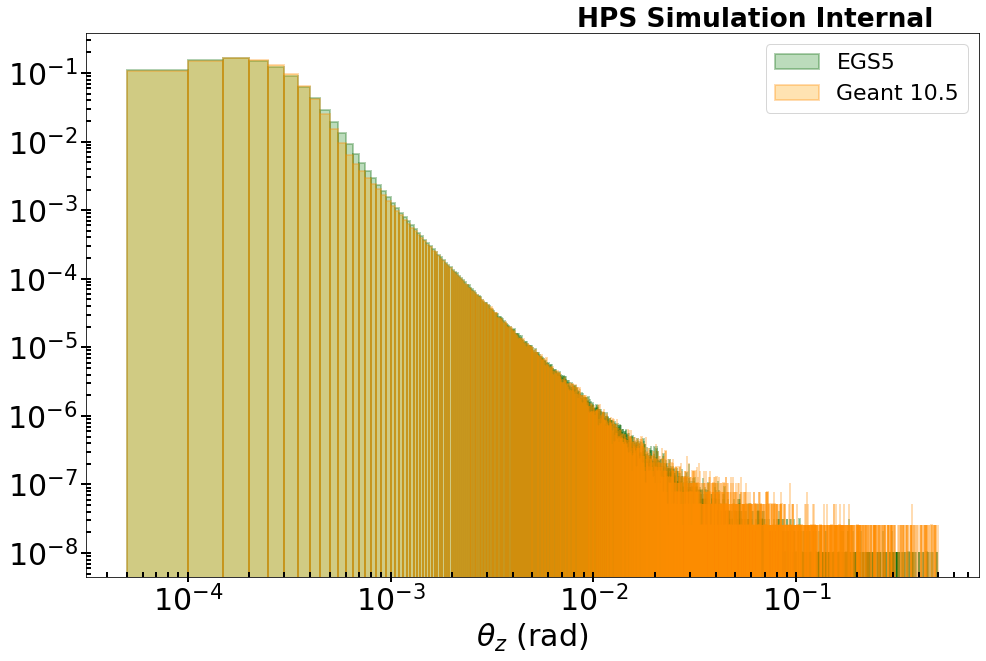

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
egsv, egsb = draw_histogram1D(ax, egs_frame[' Theta z (mrad)'], 0.00005, 0.5, 10001, 
                 x_label=r'$\theta_z$ (rad)', norm=1,
                label='EGS5')
g410pt5v, g410pt5b = draw_histogram1D(ax, g410pt5_frame['theta_z'], 0.00005, 0.5, 10001, 
                 x_label=r'$\theta_z$ (rad)',
                 edgecolor='darkorange', color='orange', norm=1,
                label='Geant 10.5')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

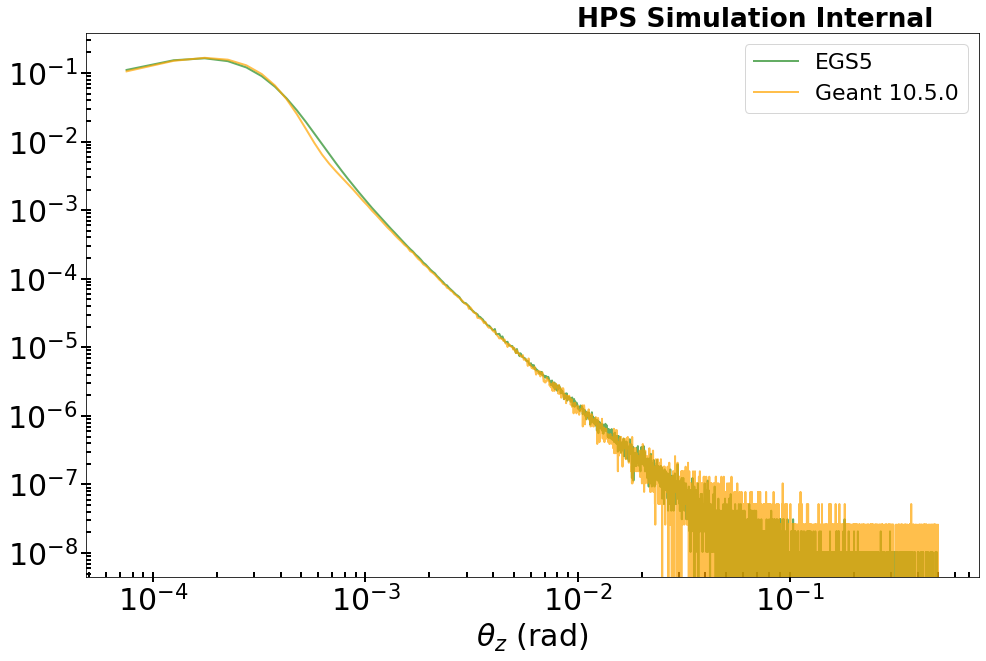

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
matplotlib.rcParams.update({'font.size': 22})

ax.plot(egsb, egsv, linewidth=2, color='forestgreen', alpha=0.7, label='EGS5')
ax.plot(g410pt5b, g410pt5v, linewidth=2, color='orange', alpha=0.7, label='Geant 10.5.0')
ax.set_yscale('log')
ax.set_xscale('log')

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

ax.set_title('HPS Simulation Internal', x=.75, fontweight='bold')
ax.set_xlabel(r'$\theta_z$ (rad)', fontsize=30)
ax.legend();